In [2]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import torch
import torchinfo
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import json
import pickle
import gzip
#import matplotlib.colors as mcolorsxx

%load_ext autoreload
%autoreload 2
import utils
import utils.filemethods as filemethods
import databuilder.data_loader as data_loader
from databuilder.data_generator import multi_input_data_organizer
# import databuilder.nino_indices as nino_indices # CAUSES CELL TO HANG

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"pytorch version = {torch.__version__}")

# https://github.com/victoresque/pytorch-template/tree/master

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]
numpy version = 1.26.4
xarray version = 2024.5.0
pytorch version = 2.0.0.post104


In [7]:
#examp = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/v2.LR.historical_0101.eam.h0.1850-01.nc")
examp = xr.open_dataset("/pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.historical_0101/archive/atm/hist/v2.LR.historical_0101.eam.h0.1850-01.nc")

In [8]:
examp.info

<bound method Dataset.info of <xarray.Dataset> Size: 445MB
Dimensions:              (ncol: 21600, lev: 72, ilev: 73, cosp_prs: 7, nbnd: 2,
                          cosp_tau: 7, cosp_scol: 10, cosp_ht: 40, cosp_sr: 15,
                          cosp_sza: 5, cosp_htmisr: 16, cosp_tau_modis: 7,
                          cosp_reffice: 6, cosp_reffliq: 6, time: 1)
Coordinates: (12/13)
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_scol            (cosp_scol) int32 40B 1 2 3 4 5 6 7 8 9 10
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
    ...                   ...
  * cosp_sza             (cosp_sza) float64 40B 0.0 20.0 40.0 60.0 80.0
  * cosp_htmisr          (cosp_htmisr) float64 128B

(21600,)


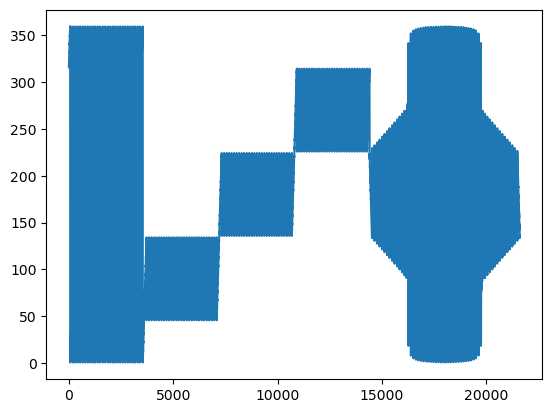

In [9]:
plt.plot(examp.lon.values)
print(examp.lon.values.shape)

(21600,)


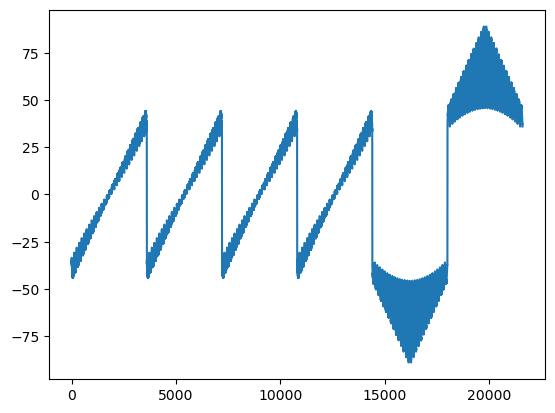

In [10]:
plt.plot(examp.lat.values)
print(examp.lat.values.shape)

### Member 0101 Nino3.4 Time Series Comparison: 

In [14]:
# NCL_nino = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/nino.member0101.nc")
# py_nino = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/member0101.Nino34.nc")

NCL_nino = xr.open_dataset("/pscratch/sd/p/plutzner/E3SM/bigdata/E3SMv2data/member0101/monthly_ne30pg2/nino.member0101.nc")
py_nino =xr.open_dataset("/pscratch/sd/p/plutzner/E3SM/bigdata/E3SMv2data/member0101/member0101.Nino34.nc")

NCL_nino34 = NCL_nino.nino34.values
py_nino34 = py_nino.TS.values


In [18]:
py_nino.time

<xarray.DataArray 'time' (time: 1980)> Size: 16kB
array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 16kB 1850-02-01 00:00:00 ... 2015-01-01 00:00:00

In [13]:
plt.figure(figsize = (20, 5))
plt.plot(NCL_nino34, linewidth = 1, color = 'turquoise', label = 'NCL Output (Mapping = ne30pg2)')
plt.plot(py_nino34, linewidth = 1, color = 'purple', label = 'Python Output (Mapping = bilinear)')
plt.axhline(0, color = 'k', linewidth = 0.5)
plt.ylim([-3.7, 3.7])
plt.legend()
#plt.savefig('/Users/C830793391/Documents/Research/E3SM/visuals/ens1/Nino34_Comparison.png', format='png', bbox_inches ='tight', dpi = 300)


NameError: name 'NCL_nino34' is not defined

<Figure size 2000x500 with 0 Axes>

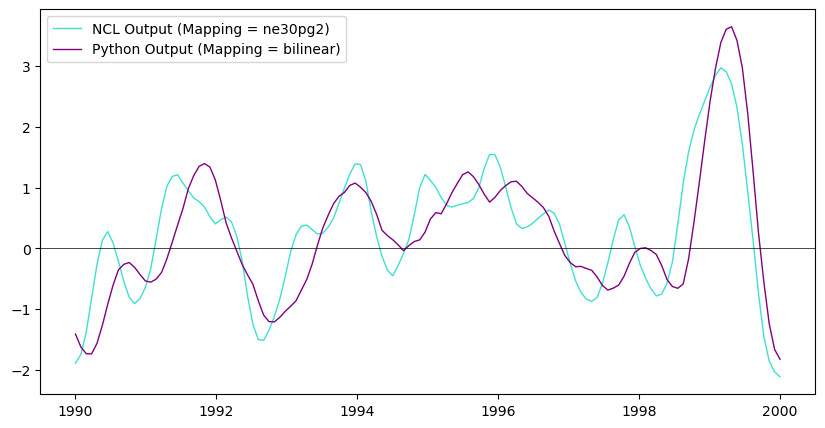

In [10]:
time1 = 1990
time2 = 2000

NCL_short = NCL_nino.sel(time = slice(str(time1),str(time2)))
NCL_short34 = NCL_short.nino34

Py_short = py_nino.sel(time = slice(str(time1), str(time2)))
Py_short34 = Py_short.TS

x = np.linspace(time1, time2, 12*(time2 - time1 + 1))
plt.figure(figsize=(10,5))
plt.plot(x, NCL_short34, linewidth = 1, color = 'turquoise', label = 'NCL Output (Mapping = ne30pg2)')
plt.plot(x, Py_short34, linewidth = 1, color = 'purple', label = 'Python Output (Mapping = bilinear)')
plt.axhline(0, color = 'k', linewidth = 0.5)
plt.legend()
plt.savefig('/pscratch/sd/p/plutzner/E3SM/visuals/ens1/Nino34_Comparison_short.png', format='png', bbox_inches ='tight', dpi = 300)

In [ ]:
print(f"the NCL/ne30 time series mean is : {np.nanmean(NCL_nino34)}")
print(f"the Python/bil time series mean is : {np.nanmean(py_nino34)}")

the NCL/ne30 time series mean is : 0.003819967620074749
the Python/bil time series mean is : 0.0032418102633056177


### Compare Map Data

In [12]:
#h0_ne30pg2 = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/v2.LR.historical_0101.eam.h0.1850-01.nc")
#h0_bil = xr.open_dataset("/Users/C830793391/BIG_DATA/E3SM_Data/ens1/v2.LR.historical_0101.eam.h0.1850-01.bil.nc")
h0_bil = xr.open_dataset("/pscratch/sd/p/plutzner/E3SM/bigdata/E3SMv2data/member0101/monthly_bilinear/v2.LR.historical_0101.eam.h0.1850-01.bil.nc")

In [13]:
h0_bil

<xarray.Dataset> Size: 1GB
Dimensions:              (lat: 180, lon: 360, nbnd: 2, time: 1, lev: 72,
                          cosp_ht: 40, cosp_htmisr: 16, cosp_tau: 7,
                          cosp_prs: 7, cosp_tau_modis: 7, cosp_reffice: 6,
                          cosp_reffliq: 6, cosp_sza: 5, cosp_scol: 10,
                          cosp_sr: 15, ilev: 73)
Coordinates: (12/15)
  * lat                  (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
  * cosp_htmisr          (cosp_htmisr) float64 128B 0.0 250.0 ... 1.8e+04
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 48B 5e-06 1.5e-05 ... 7.5e-05
    ...                   ...
  * cosp_sza             (cosp_sza) float64 40B 0.0 20.0 40.0 60.0 80.0
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_tau_modis       (cosp_tau_modis) float64 56B 0.15 0.8 ... 41.5 100.0
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * time                 (time) object 8B 1850-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/471)
    lat_bnds             (lat, nbnd) float64 3kB ...
    lon_bnds             (lon, nbnd) float64 6kB ...
    gw                   (lat) float64 1kB ...
    area                 (lat, lon) float64 518kB ...
    AEROD_v              (time, lat, lon) float32 259kB ...
    ANRAIN               (time, lev, lat, lon) float32 19MB ...
    ...                   ...
    soa_c2SFWET          (time, lat, lon) float32 259kB ...
    soa_c3DDF            (time, lat, lon) float32 259kB ...
    soa_c3SFWET          (time, lat, lon) float32 259kB ...
    sol_tsi              (time) float64 8B ...
    time_bnds            (time, nbnd) object 16B ...
    time_written         (time) |S8 8B ...
Attributes: (12/26)
    ne:                        30
    fv_nphys:                  2
    title:                     EAM History file information
    source:                    E3SM Atmosphere Model
    source_id:                 32655baa1f
    product:                   model-output
    ...                        ...
    remap_hostname:            nid004835
    remap_version:             5.2.4
    NCO:                       netCDF Operators version 5.2.4 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /pscratch/sd/p/plma/shared/for_jolan/map_ne30p...
    input_file:                /pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.histori...

In [56]:
dailyinterp = xr.open_dataset("/pscratch/sd/p/plutzner/E3SM/bigdata/E3SMv2data/member0101/member0101.Nino34.daily.int.nc")
print(dailyinterp.time)

<xarray.DataArray 'time' (time: 60195)> Size: 482kB
array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 482kB 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    standard_name:  time
    axis:           T


In [57]:
temp =dailyinterp.TS.values

(0.0, 400.0)

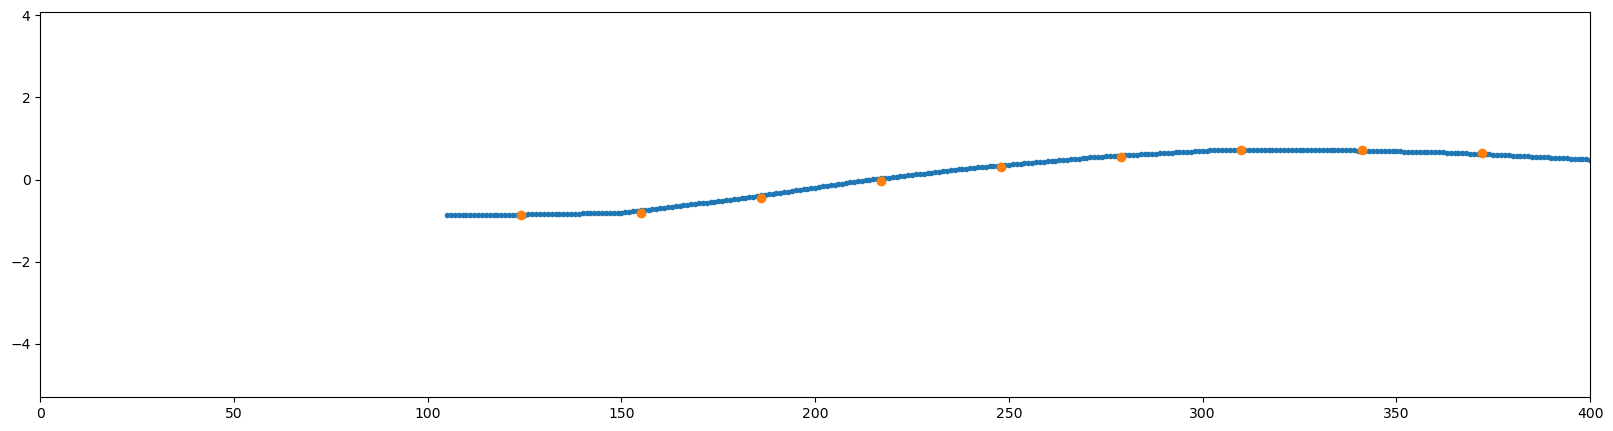

In [54]:
xvals = np.arange(0, 61380, 31)

plt.figure(figsize=(20,5))
plt.plot(temp, '.')
plt.plot(xvals, py_nino34, 'o')
plt.xlim([0,400])